In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import floor


path to given rating file - here patient S05

In [154]:
path = r"C:\Users\48660\Desktop\Development Workshop\ratings\2022_Dec_22_0959S05.csv"

In [155]:
#reading the file
rating_1 = pd.read_csv(path)


#looking for NaN values in columns (if sum(NaNs) >= 240 then delete column)
columns_dropped = []

print("Amount of NaN values in columns: ")
for column in rating_1.columns:
    
    nan_sum = rating_1[column].isna().sum()
    print(f"Column: --- {column} --- amount of NaN values: --- {nan_sum} ---")
    
    if nan_sum >= 240:
        
        rating_1.drop([column], axis = 1, inplace = True)
        columns_dropped.append(column)
        
    if nan_sum in range(1,11,1):
        nan_indices = rating_1[column].index[rating_1[column].isna()]
        
        for i in nan_indices:
            
            if rating_1[[column]].dtypes.values == 'float64':
                
                if i == 0:  
                    
                    if not pd.isna(rating_1.loc[i+1, column]):
                        rating_1.loc[i, column] = rating_1.loc[i + 1, column]
                    else:
                        rating_1.loc[i, column] = rating_1[column].mean()
                        
                elif i == rating_1.shape[0] - 1:
                    
                    if not pd.isna(rating_1.loc[i-1, column]):
                        rating_1.loc[i, column] = rating_1.loc[i - 1, column]
                    else:
                        rating_1.loc[i, column] = rating_1[column].mean()

                else:
                    
                        if pd.isna(rating_1.loc[i - 1, column]) and pd.isna(rating_1.loc[i + 1, column]):
                            rating_1.loc[i, column] = rating_1[column].mean()
                            
                        elif pd.isna(rating_1.loc[i - 1, column]):
                            rating_1.loc[i, column] = rating_1.loc[i + 1, column]
                            
                        elif pd.isna(rating_1.loc[i + 1, column]):
                            rating_1.loc[i, column] = rating_1.loc[i - 1, column]
                            
                        else:
                            rating_1.loc[i, column] = ( rating_1.loc[i - 1, column] + rating_1.loc[i + 1, column] ) / 2 

                if column in ['Arousal_rating.response', 'Valence_rating.response']:
                    rating_1.loc[i, column] = floor(rating_1.loc[i,column])
                    
                    
                    
print(f"Amount of columns dropped: {len(columns_dropped)}")

rating_1.head()

Amount of NaN values in columns: 
Column: --- image9 --- amount of NaN values: --- 4 ---
Column: --- trials.thisRepN --- amount of NaN values: --- 4 ---
Column: --- trials.thisTrialN --- amount of NaN values: --- 4 ---
Column: --- trials.thisN --- amount of NaN values: --- 4 ---
Column: --- trials.thisIndex --- amount of NaN values: --- 4 ---
Column: --- trials_2.thisRepN --- amount of NaN values: --- 244 ---
Column: --- trials_2.thisTrialN --- amount of NaN values: --- 244 ---
Column: --- trials_2.thisN --- amount of NaN values: --- 244 ---
Column: --- trials_2.thisIndex --- amount of NaN values: --- 244 ---
Column: --- text_2.started --- amount of NaN values: --- 248 ---
Column: --- text_2.stopped --- amount of NaN values: --- 249 ---
Column: --- text_9.started --- amount of NaN values: --- 248 ---
Column: --- text_9.stopped --- amount of NaN values: --- 249 ---
Column: --- image_4.started --- amount of NaN values: --- 248 ---
Column: --- image_4.stopped --- amount of NaN values: ---

,image9,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,text_4.started,image.started,mouse.started,Valence.started,Valence_rating.response,...,Valence_rating.started,Arousal.started,Arousal_rating.response,Arousal_rating.rt,Arousal_rating.started,Kod_osoby_badanej,date,expName,psychopyVersion,frameRate
0,NaN,0.0,119.795918,119.795918,118.710204,1120.432179,1120.432179,0.007560,1123.711207,5.0,...,0.006883,1123.711207,4.0,2.818804,0.006883,S05,2022_Dec_22_0959,rating,2021.1.4,59.995776
1,NaN,0.0,119.795918,119.795918,118.710204,1120.432179,1120.432179,0.007560,1123.711207,5.0,...,0.006883,1123.711207,4.0,2.818804,0.006883,S05,2022_Dec_22_0959,rating,2021.1.4,59.995776
2,NaN,0.0,59.897959,59.897959,63.855102,611.021838,611.021838,0.007018,617.979584,6.0,...,0.007685,617.979584,5.0,15.629402,0.007685,S05,2022_Dec_22_0959,rating,2021.1.4,59.995776
3,hi_pos_IAPS_4658.png,0.0,0.000000,0.000000,9.000000,101.611497,101.611497,0.006476,112.247960,8.0,...,0.008486,112.247960,7.0,28.440000,0.008486,S05,2022_Dec_22_0959,rating,2021.1.4,59.995776
4,hi_neg_IAPS_9584.png,0.0,1.000000,1.000000,51.000000,140.734119,140.734119,0.011315,144.187693,3.0,...,0.014416,144.187693,5.0,23.562000,0.014416,S05,2022_Dec_22_0959,rating,2021.1.4,59.995776


In [156]:
rating_1.dropna(subset = 'image9', inplace = True) #we have to delete all rows where image9 doesn't have any value (no image included)
rating_1.reset_index(drop = True, inplace = True)

In [157]:
columns_to_drop = ['trials.thisRepN', 'frameRate', 'psychopyVersion']   #additional columns to drop
rating_1.drop(columns_to_drop, inplace = True, axis = 1)


In [158]:
rating_1.describe()

,trials.thisTrialN,trials.thisN,trials.thisIndex,text_4.started,image.started,mouse.started,Valence.started,Valence_rating.response,Valence_rating.rt,Valence_rating.started,Arousal.started,Arousal_rating.response,Arousal_rating.rt,Arousal_rating.started
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.00000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,119.795918,119.795918,118.710204,1122.575067,1122.575067,0.007549,1125.948534,5.04898,3.912363,0.006873,1125.948534,4.877551,2.818000,0.006873
std,69.342929,69.342929,69.530758,472.229333,472.229333,0.004690,471.626302,1.77114,2.738178,0.006023,471.626302,1.477046,3.091864,0.006023
min,0.000000,0.000000,0.000000,101.611497,101.611497,0.000274,112.247960,1.00000,1.686000,0.000040,112.247960,1.000000,0.703000,0.000040
25%,60.000000,60.000000,59.000000,754.292826,754.292826,0.003865,757.933774,4.00000,2.646000,0.002057,757.933774,4.000000,1.377000,0.002057
50%,120.000000,120.000000,118.000000,1156.879766,1156.879766,0.006663,1157.929484,5.00000,3.259000,0.003417,1157.929484,5.000000,1.881000,0.003417
75%,179.000000,179.000000,179.000000,1506.318526,1506.318526,0.011315,1518.082326,6.00000,4.201000,0.014249,1518.082326,6.000000,2.993000,0.014249
max,239.000000,239.000000,239.000000,1885.923461,1885.923461,0.016645,1887.283747,9.00000,26.731000,0.016663,1887.283747,9.000000,28.440000,0.016663


In [159]:
rating_1.columns

Index(['image9', 'trials.thisTrialN', 'trials.thisN', 'trials.thisIndex',
       'text_4.started', 'image.started', 'mouse.started', 'Valence.started',
       'Valence_rating.response', 'Valence_rating.rt',
       'Valence_rating.started', 'Arousal.started', 'Arousal_rating.response',
       'Arousal_rating.rt', 'Arousal_rating.started', 'Kod_osoby_badanej',
       'date', 'expName'],
      dtype='object')

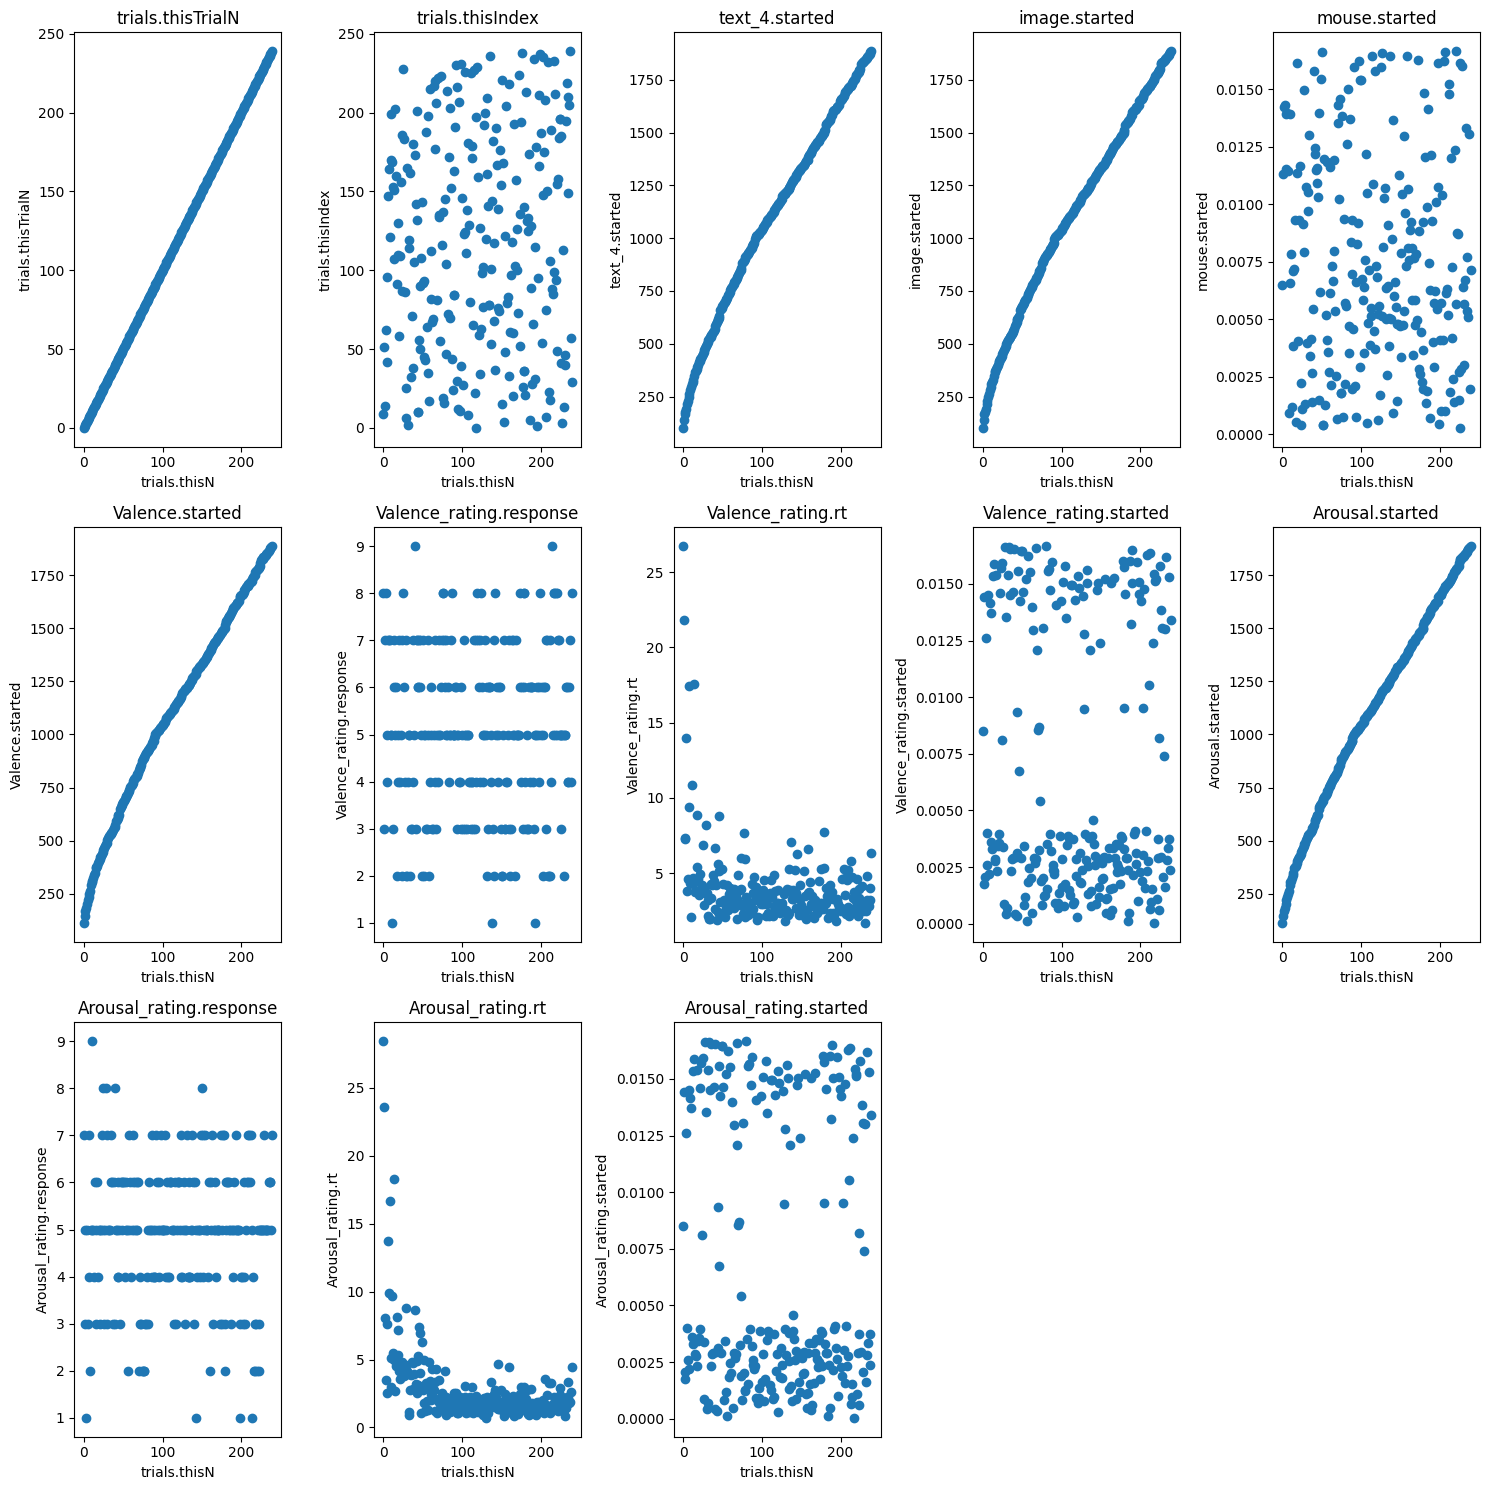

In [160]:
numeric_columns = rating_1.select_dtypes(include='number').columns.tolist() #identyfing numerical columns
numeric_columns.remove('trials.thisN')  #we remove our base (x-axis) column for numerics

num_plots = len(numeric_columns)
num_cols = 5  
num_rows = (num_plots + num_cols - 1) // num_cols  

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axs = axs.flatten() #flattening of axs for iteration purposes

for i, col in enumerate(numeric_columns):
    ax = axs[i]
    ax.scatter(rating_1['trials.thisN'], rating_1[col], marker='o', linestyle='-')
    ax.set_title(col)
    ax.set_xlabel('trials.thisN')
    ax.set_ylabel(col)

#deleting useless columns
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [161]:
def plot_histogram(df, column, no_bins = 9):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins= no_bins, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

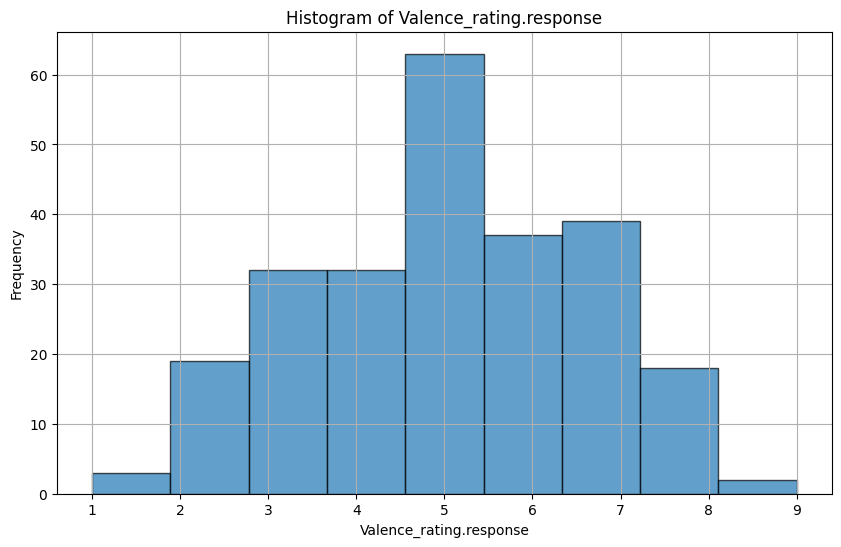

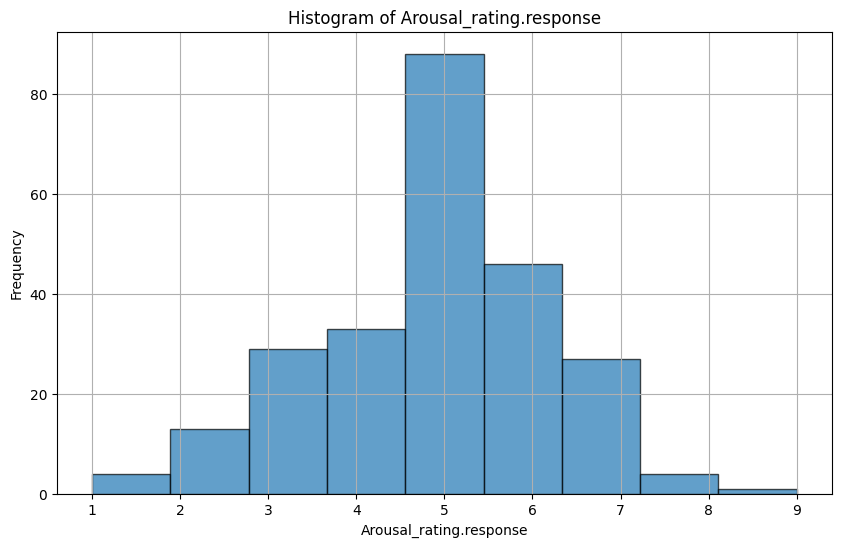

In [162]:
plot_histogram(rating_1, 'Valence_rating.response')
plot_histogram(rating_1, 'Arousal_rating.response')

As shown in the graphs (trials.thisN - Arousal_rating.response / trials.thisN - Valence_rating.response) all values are in range 1 - 9.

For the next part we delete columns useless for our Models: Kod_osoby_badanej, date, expName, image9

In [163]:
cols = ['Kod_osoby_badanej', 'date', 'expName', 'image9']
rating_1.drop(cols, inplace = True, axis = 1)


In [179]:
list(range(1,5,1))

[1, 2, 3, 4]

In [164]:
def valence_apply(row):
        return 'low valence' if row in list(range(1,5,1)) else 'high valence'
def arousal_apply(row):
        return 'low arousal' if row in list(range(1,5,1)) else 'high arousal'

# Apply categorization to the dataset
rating_1['Valence behaviour'] = rating_1['Valence_rating.response'].apply(valence_apply)
rating_1['Arousal behaviour'] = rating_1['Arousal_rating.response'].apply(arousal_apply)

Creating machine learning models - starting of with data selection and changes

In [165]:
data = rating_1.copy()
data['Valence behaviour'] = np.where( data['Valence behaviour'] == 'high valence', 1, 0)
data['Arousal behaviour'] = np.where( data['Arousal behaviour'] == 'high arousal', 1, 0)


#deleting response ratings
data.drop(['Valence_rating.response', 'Arousal_rating.response'], inplace = True, axis = 1)

data.drop('trials.thisIndex', inplace = True, axis = 1)

In [166]:
data.columns

Index(['trials.thisTrialN', 'trials.thisN', 'text_4.started', 'image.started',
       'mouse.started', 'Valence.started', 'Valence_rating.rt',
       'Valence_rating.started', 'Arousal.started', 'Arousal_rating.rt',
       'Arousal_rating.started', 'Valence behaviour', 'Arousal behaviour'],
      dtype='object')

In [167]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [168]:
target = 'Valence behaviour'

X = data.drop(columns = ['Valence behaviour', 'Arousal behaviour'])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

Decision Tree Classifier implementation

Accuracy: 0.6351351351351351
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51        28
           1       0.70      0.72      0.71        46

    accuracy                           0.64        74
   macro avg       0.61      0.61      0.61        74
weighted avg       0.63      0.64      0.63        74



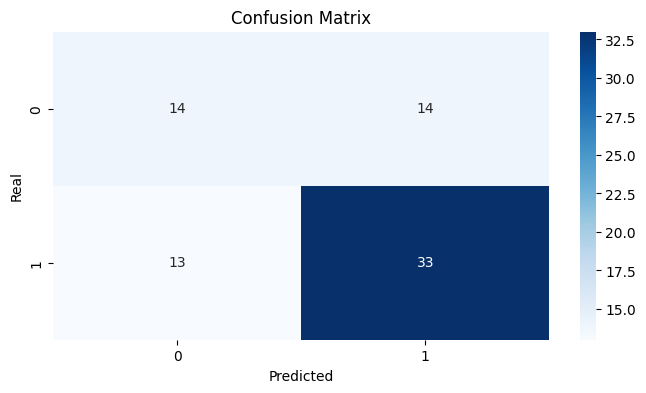

In [169]:
# Initialize the Decision Tree Classifier
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

Decision Tree Classifier implementation ( 10 - K Validation with Tuner)

In [170]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [171]:
clf = DecisionTreeClassifier(random_state=42)

# Initialize Tuner and fit values to it
grid_search = GridSearchCV(estimator=clf, param_grid = param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Predict with use of cross-validation
y_pred_cv = cross_val_predict(best_clf, X, y, cv=10)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


Accuracy: 0.5591836734693878
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.37      0.37        86
           1       0.66      0.66      0.66       159

    accuracy                           0.56       245
   macro avg       0.52      0.52      0.52       245
weighted avg       0.56      0.56      0.56       245



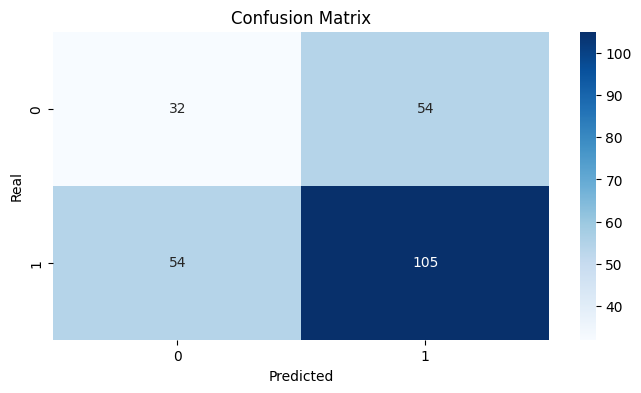

In [172]:
# Evaluate the model
accuracy = accuracy_score(y, y_pred_cv)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y, y_pred_cv))

# Create the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_cv)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()


In [173]:
target = 'Arousal behaviour'

X = data.drop(columns = ['Valence behaviour', 'Arousal behaviour'])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

Accuracy: 0.6081081081081081
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.50      0.41        20
           1       0.78      0.65      0.71        54

    accuracy                           0.61        74
   macro avg       0.56      0.57      0.56        74
weighted avg       0.66      0.61      0.63        74

Confusion Matrix:


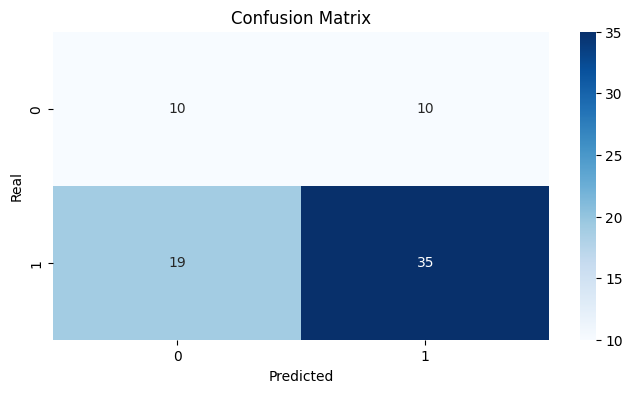

In [174]:
# Initialize the Decision Tree Classifier
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [175]:
clf = DecisionTreeClassifier(random_state=42)

# Initialize Tuner and fit values to it
grid_search = GridSearchCV(estimator=clf, param_grid = param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Predict with use of cross-validation
y_pred_cv = cross_val_predict(best_clf, X, y, cv=10)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


Accuracy: 0.6081632653061224
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.30      0.33        79
           1       0.69      0.75      0.72       166

    accuracy                           0.61       245
   macro avg       0.53      0.53      0.53       245
weighted avg       0.59      0.61      0.60       245



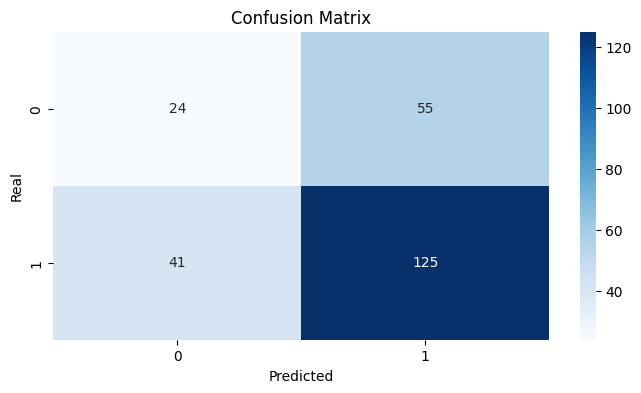

In [176]:
# Evaluate the model
accuracy = accuracy_score(y, y_pred_cv)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y, y_pred_cv))

# Create the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_cv)

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()
